# NLP Assignment I
### Team Group 113
### KANDERAO LAXMI NARASIMHA RAO	2018ah04599
### M NAVEEN KUMAR	                                  2018ah04543
### 1. Import Required Libraries

In [30]:
# Libraries For Basic Processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Libraries For NLTK Libraries
import nltk
import string
import re

from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

# Libraries For Sentence Tokenization  - Tokenizes sentences from text
from nltk.tokenize import sent_tokenize
# Libraries For Sentence Word Tokenization  - Tokenizes words in sentences
from nltk.tokenize import word_tokenize

# Libraries For Removal of stop words from the text
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
# Libraries For Lemmatization
from nltk.stem import WordNetLemmatizer
# Stemming
from nltk.stem import PorterStemmer

from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# import pipeline, CountVectorizer, TfidfTransformer, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



[nltk_data] Downloading package stopwords to /Users/klrao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.  Read Csv file

In [31]:
df = pd.read_csv("kindle_reviews.csv")

In [32]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [33]:
df['overall'].value_counts()

5    575264
4    254013
3     96194
2     34130
1     23018
Name: overall, dtype: int64

Text(0.5, 1.0, 'Sentiment Data Distribution')

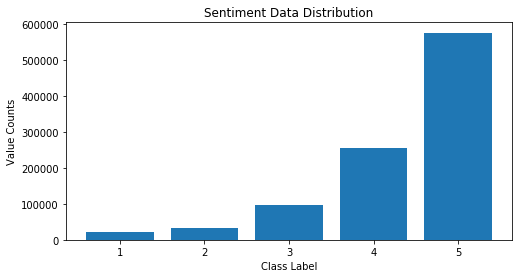

In [34]:
val_counts = df['overall'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_counts.index,val_counts.values)
plt.xlabel("Class Label")
plt.ylabel("Value Counts")
plt.title("Sentiment Data Distribution")

### 2. Text Processing - Remove Below kind of words from text column
2.1 Remove Punctuations 
2.2 Remove Special Characters
2.3 Remove Stop Words 

In [35]:
df[['overall','reviewText']].head()

,overall,reviewText
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."


In [36]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [37]:
def preprocess(text,stem=False):
    
    #------------------------------
    # Convert Text to Lower Case 
    # Remove Special Characters
    #------------------------------
    text = re.sub(text_cleaning_re,' ',str(text).lower()).strip()
    
    #------------------------------
    # Remove Punctuation
    #------------------------------
    tokens = []
    for char in text:
        if char not in punctuation:
            text = text + char  
    #-----------------------        
    # Remove Stop Words
    #-----------------------
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
            
    return " ".join(tokens)

In [38]:
df.reviewText = df.reviewText.apply(lambda x:preprocess(x,False))

In [39]:
df[['overall','reviewText']].head()

,overall,reviewText
0,5,enjoy vintage books movies enjoyed reading boo...
1,4,book reissue old one author born 1910 era say ...
2,4,fairly interesting read old style terminology ...
3,5,never read amy brewster mysteries one really h...
4,4,like period pieces clothing lingo enjoy myster...


### 3.1 Create X,Y Objects 
### 3.2 Split the data into training and testing sets

In [40]:
X,y = df['reviewText'],df['overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2 Create CountVectorizer Object

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(786095,)
(196524,)
(786095,)
(196524,)


In [42]:
# 2. instantiate the vectorizer
vect = CountVectorizer()

In [43]:
# learn training data vocabulary, then use it to create a document-term matrix

# 3. fit
vect.fit(X_train)

# 4. transform training data
X_train_dtm = vect.transform(X_train)

In [44]:
# equivalently: combine fit and transform into a single step
# this is faster and what most people would do
X_train_dtm = vect.fit_transform(X_train)

In [45]:
# examine the document-term matrix
X_train_dtm

<786095x472541 sparse matrix of type '<class 'numpy.int64'>'
	with 36098301 stored elements in Compressed Sparse Row format>

In [46]:
# 4. transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

# you can see that the number of columns, 7456, is the same as what we have learned above in X_train_dtm

<196524x472541 sparse matrix of type '<class 'numpy.int64'>'
	with 8952127 stored elements in Compressed Sparse Row format>

### 3.3 Train a MultinomialNB - Using GridSearchCV for classification

In [47]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [48]:
# 3. train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time nb.fit(X_train_dtm, y_train)

CPU times: user 760 ms, sys: 71.7 ms, total: 832 ms
Wall time: 834 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [50]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.632859091001608

In [51]:
# examine class distribution
print(y_test.value_counts())
# there is a majority class of 0 here, hence the classes are skewed

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)
print(y_train.value_counts())

5    115392
4     50699
3     19169
2      6717
1      4547
Name: overall, dtype: int64
Null accuracy: 5    0.587165
Name: overall, dtype: float64
5    459872
4    203314
3     77025
2     27413
1     18471
Name: overall, dtype: int64


In [52]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 1389,  1249,  1172,   204,   533],
       [  484,  1529,  3340,   608,   756],
       [  320,  1070,  9853,  4770,  3156],
       [  179,   349,  8920, 20364, 20887],
       [  269,   289,  4272, 19325, 91237]])

In [53]:
# print message text for the false positives (ham incorrectly classified as spam)

X_test[y_pred_class > y_test]

256249    john summit digs deep lives minds convicted ch...
344759    lots good insight really practical information...
853169    begin really liked book started think readers ...
848242    happy result happy ending awhile thought might...
188350    enjoyed reading book never knew one minute nex...
                                ...                        
391903    surprised trouble book read writer might want ...
389887    short story book would say rough draft story b...
124850    helpful gives great advice writing got better ...
626422    story elements appeal young lovers daphne hank...
245364    corina delivers great source healthy snacks he...
Name: reviewText, Length: 36675, dtype: object

In [54]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


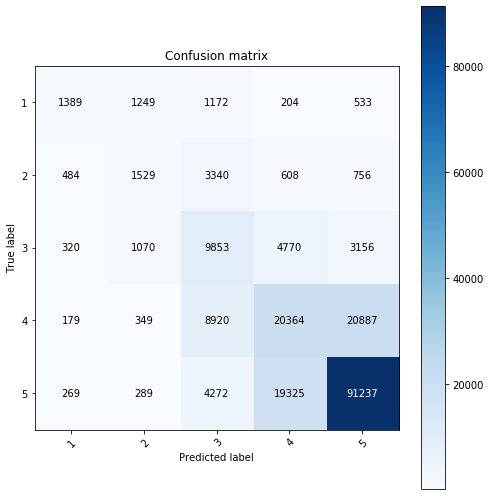

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

#y_pred=model.predict_classes(test_sentences)
#y_true=np.argmax(test_sentiments)

# compute the confusion matrix
#confusion_mtx = confusion_matrix(y_true,y_pred) 
class_names=['1','2','3','4','5']
 
plot_confusion_matrix(y_test, y_pred_class, classes = class_names, title='Confusion matrix')



### 5. Display POS Tagging for 4 Rows of Review Text

In [56]:
nltk.download('brown')

[nltk_data] Downloading package brown to /Users/klrao/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [57]:
from nltk import UnigramTagger
from nltk.corpus import brown
tagged_sentences = brown.tagged_sents(categories='news')
tagged_sentences

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [58]:
df_tag=df['reviewText'][0:4].head().copy()

In [59]:
df_tag

0    enjoy vintage books movies enjoyed reading boo...
1    book reissue old one author born 1910 era say ...
2    fairly interesting read old style terminology ...
3    never read amy brewster mysteries one really h...
Name: reviewText, dtype: object

In [60]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/klrao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/klrao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [61]:
def posTag(statement):

    # sent_tokenize is one of instances of  
    # PunktSentenceTokenizer from the nltk.tokenize.punkt module 
    
    tokenized = sent_tokenize(statement) 
    tokens = []
    for i in tokenized: 
        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 
  
        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stop_words]  
  
        #  Using a Tagger. Which is part-of-speech  
        # tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList) 
        #tokens.append(tagged)
        print(tagged) 
    return tagged

In [62]:
df_tag = df_tag.apply(lambda x:posTag(x))
#df_tag = posTag(df_tag[0])
#df_tag = posTag(df_tag[0])

[('enjoy', 'NN'), ('vintage', 'NN'), ('books', 'NNS'), ('movies', 'NNS'), ('enjoyed', 'VBD'), ('reading', 'VBG'), ('book', 'NN'), ('plot', 'NN'), ('unusual', 'JJ'), ('think', 'NN'), ('killing', 'VBG'), ('someone', 'NN'), ('self', 'NN'), ('defense', 'NN'), ('leaving', 'VBG'), ('scene', 'NN'), ('body', 'NN'), ('without', 'IN'), ('notifying', 'VBG'), ('police', 'NN'), ('hitting', 'VBG'), ('someone', 'NN'), ('jaw', 'NN'), ('knock', 'NN'), ('would', 'MD'), ('wash', 'VB'), ('today', 'NN'), ('still', 'RB'), ('good', 'JJ'), ('read', 'NN'), ('mei', 'NN'), ('enjoy', 'VBP'), ('vintage', 'NN'), ('books', 'NNS'), ('movies', 'NNS'), ('enjoyed', 'VBD'), ('reading', 'VBG'), ('book', 'NN'), ('plot', 'NN'), ('unusual', 'JJ'), ('think', 'NN'), ('killing', 'VBG'), ('someone', 'NN'), ('self', 'NN'), ('defense', 'NN'), ('leaving', 'VBG'), ('scene', 'NN'), ('body', 'NN'), ('without', 'IN'), ('notifying', 'VBG'), ('police', 'NN'), ('hitting', 'VBG'), ('someone', 'NN'), ('jaw', 'NN'), ('knock', 'NN'), ('would'

In [63]:
for i in range(1):
    for j in range(len(df_tag[i])):
        print(df_tag[i][j][0],"\t=>",df_tag[i][j][1])


enjoy 	=> NN
vintage 	=> NN
books 	=> NNS
movies 	=> NNS
enjoyed 	=> VBD
reading 	=> VBG
book 	=> NN
plot 	=> NN
unusual 	=> JJ
think 	=> NN
killing 	=> VBG
someone 	=> NN
self 	=> NN
defense 	=> NN
leaving 	=> VBG
scene 	=> NN
body 	=> NN
without 	=> IN
notifying 	=> VBG
police 	=> NN
hitting 	=> VBG
someone 	=> NN
jaw 	=> NN
knock 	=> NN
would 	=> MD
wash 	=> VB
today 	=> NN
still 	=> RB
good 	=> JJ
read 	=> NN
mei 	=> NN
enjoy 	=> VBP
vintage 	=> NN
books 	=> NNS
movies 	=> NNS
enjoyed 	=> VBD
reading 	=> VBG
book 	=> NN
plot 	=> NN
unusual 	=> JJ
think 	=> NN
killing 	=> VBG
someone 	=> NN
self 	=> NN
defense 	=> NN
leaving 	=> VBG
scene 	=> NN
body 	=> NN
without 	=> IN
notifying 	=> VBG
police 	=> NN
hitting 	=> VBG
someone 	=> NN
jaw 	=> NN
knock 	=> NN
would 	=> MD
wash 	=> VB
today 	=> NN
still 	=> RB
good 	=> JJ
read 	=> NN


### 6. Build and Display a dependency parser tree for sentence

"When Jon Snow is stranded north of the Wall, half-frozen and under attack by wights, Benjen rides in and puts Jon on his horse."

In [65]:
import spacy

In [75]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [81]:

import en_core_web_sm

nlp = en_core_web_sm.load()
text='When Jon Snow is stranded north of the Wall, half-frozen and under attack by wights, Benjen rides in and puts Jon on his horse.'

for token in nlp(text):
 print(token.text,'=>',token.dep_,'=>',token.head.text)

When => advmod => stranded
Jon => compound => Snow
Snow => nsubjpass => stranded
is => auxpass => stranded
stranded => advcl => rides
north => advmod => stranded
of => prep => north
the => det => Wall
Wall => pobj => of
, => punct => north
half => advmod => frozen
- => punct => frozen
frozen => conj => north
and => cc => frozen
under => conj => frozen
attack => pobj => under
by => prep => attack
wights => pobj => by
, => punct => rides
Benjen => nsubj => rides
rides => ROOT => rides
in => prt => rides
and => cc => rides
puts => conj => rides
Jon => dobj => puts
on => prep => puts
his => poss => horse
horse => pobj => on
. => punct => rides
